# 2022 Fuel Consumption Rating Analysis
#### About Dataset
Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada in 2022.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read and view dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fuel Consumption Ratings.csv to Fuel Consumption Ratings.csv


In [3]:
df=pd.read_csv('Fuel Consumption Ratings.csv')
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


#### Checking the shape, datatype,describe and information of dataset

In [4]:
df.shape

(946, 15)

In [5]:
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [6]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [8]:
df.isna().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

#### Copy the data to another set and renaming the columns and droping the columns

In [9]:
df1=df.copy()

In [10]:
df1.rename({'Fuel Consumption (City (L/100 km)':'CityFuelConsumption',
            'Fuel Consumption(Hwy (L/100 km))':'HwyFuelConsumption',
           'Fuel Consumption(Comb (mpg))':'CombinedFuelConsumption','Engine Size(L)':'EngineSize(L)',
           'CO2 Rating':'CO2Rating','Smog Rating':'SmogRating','CO2 Emissions(g/km)':'CO2Emissions(g/km)'},inplace=True,axis=1)

In [11]:
df1

,Model Year,Make,Model,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,Fuel Consumption(Comb (L/100 km)),CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [12]:
df1.drop(['Fuel Consumption(Comb (L/100 km))','Model'],axis=1,inplace=True)

#### Checking the top and bottom records

In [13]:
df1.head(20)

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
0,2022,Acura,Compact,2.4,4,AM8,Z,9.9,7.0,33,200,6,3
1,2022,Acura,SUV: Small,3.5,6,AS10,Z,12.6,9.4,25,263,4,5
2,2022,Acura,SUV: Small,2.0,4,AS10,Z,11.0,8.6,29,232,5,6
3,2022,Acura,SUV: Small,2.0,4,AS10,Z,11.3,9.1,27,242,5,6
4,2022,Acura,Compact,2.0,4,AS10,Z,11.2,8.0,29,230,5,7
5,2022,Acura,Compact,2.0,4,AS10,Z,11.3,8.1,29,231,5,7
6,2022,Acura,Compact,3.0,6,AS10,Z,12.3,9.4,26,256,5,5
7,2022,Acura,Compact,3.0,6,AS10,Z,12.3,9.8,25,261,4,5
8,2022,Alfa Romeo,Mid-size,2.0,4,A8,Z,10.0,7.2,32,205,6,3
9,2022,Alfa Romeo,Mid-size,2.0,4,A8,Z,10.5,7.7,31,217,5,3


In [14]:
df1.tail(20)

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
926,2022,Volkswagen,Compact,1.5,4,M6,X,8.0,5.5,41,161,7,7
927,2022,Volkswagen,Compact,2.0,4,AM7,X,9.0,6.5,36,185,6,7
928,2022,Volkswagen,Compact,2.0,4,M6,X,9.1,6.4,36,186,6,7
929,2022,Volkswagen,Mid-size,2.0,4,AS6,X,9.7,6.6,34,196,6,7
930,2022,Volkswagen,SUV: Small,1.5,4,A8,X,8.4,6.6,37,178,7,7
931,2022,Volkswagen,SUV: Small,1.5,4,A7,X,9.5,7.4,33,200,6,7
932,2022,Volkswagen,SUV: Small,2.0,4,AS8,X,10.6,8.0,30,222,5,7
933,2022,Volkswagen,SUV: Small,2.0,4,AS8,X,11.0,8.3,29,229,5,7
934,2022,Volvo,Compact,2.0,4,AS8,Z,9.0,6.7,35,186,6,5
935,2022,Volvo,Compact,2.0,4,AS8,Z,9.4,6.9,34,193,6,5


In [47]:
engine_df1=df1.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_df1

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
1.2,12,662,28,24
1.3,28,1639,46,52
1.4,24,1165,36,38
1.5,115,5842,208,215
1.6,92,3647,167,135
1.8,36,1398,66,51
2.0,840,44410,1162,1175
2.3,104,6949,112,134
2.4,84,4789,106,92


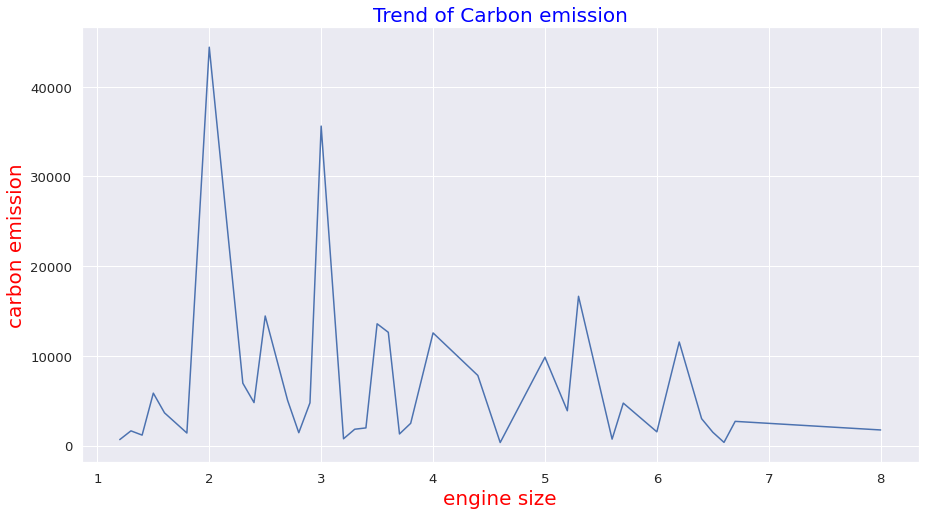

In [52]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data = engine_df1, x = 'EngineSize(L)', y = 'CO2Emissions(g/km)')

ax.set_title('Trend of Carbon emission', fontsize=20,color='blue')

ax.set_xlabel("engine size", fontsize=20,color='red')

ax.set_ylabel("carbon emission", fontsize=20,color='red')

sns.set(font_scale= 1.2)


Cars having engine size 2.0 has the maximum carbon emissions.

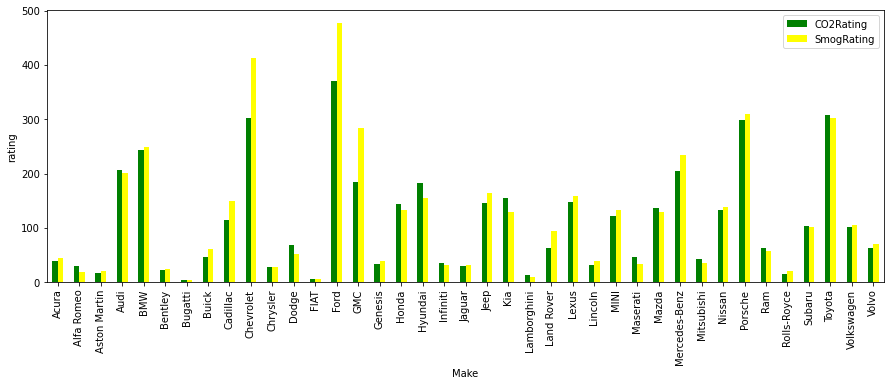

In [15]:
df1.groupby('Make')[['CO2Rating','SmogRating']].sum().plot.bar(color=['green','yellow'],figsize=(15,5))
plt.ylabel('rating')
plt.show()

Here we can see Ford has the maximum rating of CO2  and smog


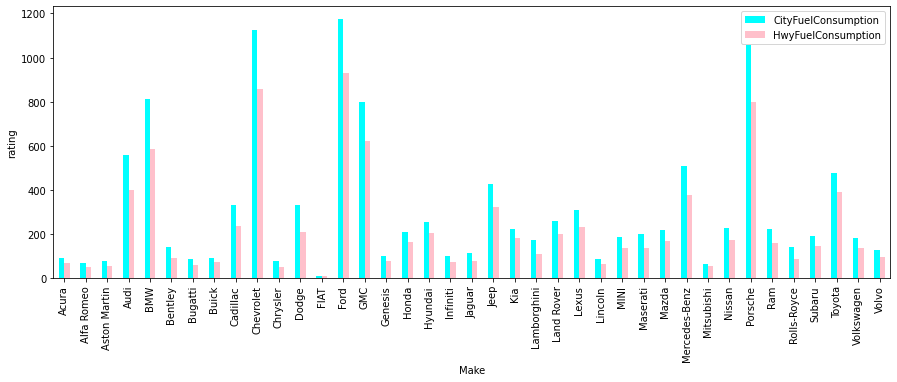

In [46]:
df1.groupby('Make')[['CityFuelConsumption','HwyFuelConsumption']].sum().plot.bar(color=['cyan','pink'],figsize=(15,5))
plt.ylabel('rating')
plt.show()

We can see Ford,Chevrolet and Porsche has the maximum fuel consumption on city and highway.

#### Dataset based on FIAT car

In [53]:
model_fiat=df1[df1['Make']=='FIAT']
model_fiat

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
277,2022,FIAT,SUV: Small,1.3,4,A9,X,10.0,7.9,31,221,5,6


In [54]:
engine_fiat=model_fiat.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_fiat

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
1.3,4,221,5,6


#### Dataset based on Bugatti car

In [55]:
model_bugatti=df1[df1['Make']=='Bugatti']
model_bugatti

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
132,2022,Bugatti,Two-seater,8.0,16,AM7,Z,26.8,16.6,13,522,1,1
133,2022,Bugatti,Two-seater,8.0,16,AM7,Z,30.3,20.9,11,608,1,1
134,2022,Bugatti,Two-seater,8.0,16,AM7,Z,30.3,20.9,11,608,1,1


In [56]:
engine_bugatti=model_bugatti.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_bugatti

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
8.0,48,1738,3,3


#### Dataset based on Audi car

In [16]:
model_audi=df1[df1['Make']=='Audi']
model_audi

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
19,2022,Audi,Subcompact,2.0,4,AM7,X,8.5,6.6,37,178,7,7
20,2022,Audi,Compact,2.0,4,AM7,Z,9.1,7.0,34,190,6,5
21,2022,Audi,Compact,2.0,4,AM7,Z,9.8,7.6,32,205,6,5
22,2022,Audi,Station wagon: Small,2.0,4,AM7,Z,9.8,7.9,32,208,6,5
23,2022,Audi,Subcompact,2.0,4,AM7,Z,10.4,7.5,31,214,5,5
24,2022,Audi,Subcompact,2.0,4,AM7,Z,9.8,7.6,32,205,6,5
25,2022,Audi,Mid-size,2.0,4,AM7,Z,9.8,7.6,32,205,6,5
26,2022,Audi,Mid-size,2.0,4,AM7,Z,10.2,7.4,32,208,6,5
27,2022,Audi,Mid-size,3.0,6,AM7,Z,11.1,7.8,29,224,5,5
28,2022,Audi,Station wagon: Mid-size,3.0,6,AM7,Z,11.5,8.3,28,234,5,5


In [45]:
engine_audi=model_audi.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_audi

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
2.0,72,3821,99,96
2.5,5,235,5,3
2.9,24,1043,18,20
3.0,72,2914,56,60
4.0,48,1967,17,18
5.2,40,1356,12,4


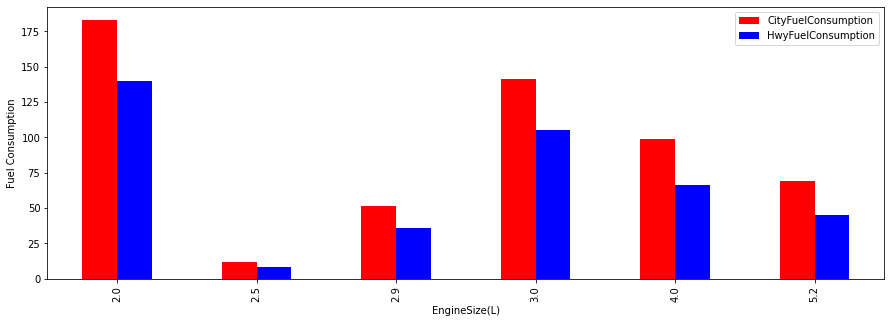

In [18]:
model_audi.groupby('EngineSize(L)')[['CityFuelConsumption','HwyFuelConsumption']].sum().plot.bar(color=['red','blue'],figsize=(15,5))
plt.ylabel('Fuel Consumption')
plt.show()

 Audi having engine size 2.0 has maximum fuel consumption

#### Dataset based on Chevrolet car

In [34]:
model_chevrolet=df1[df1['Make']=='Chevrolet']
model_chevrolet

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
170,2022,Chevrolet,SUV: Small,2.0,4,A9,X,10.6,8.0,30,221,5,7
171,2022,Chevrolet,SUV: Small,3.6,6,A9,X,12.3,8.8,26,252,5,6
172,2022,Chevrolet,SUV: Small,2.0,4,A9,X,10.8,8.7,29,232,5,7
173,2022,Chevrolet,SUV: Small,3.6,6,A9,X,12.6,9.2,26,259,4,6
174,2022,Chevrolet,Subcompact,2.0,4,AS8,Z,10.9,7.8,30,222,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022,Chevrolet,SUV: Small,1.3,3,A9,X,8.9,7.8,34,197,6,7
246,2022,Chevrolet,SUV: Standard,3.6,6,A9,X,13.0,8.8,25,260,4,6
247,2022,Chevrolet,SUV: Standard,3.6,6,A9,X,13.6,9.6,24,277,4,6
248,2022,Chevrolet,SUV: Small,1.4,4,AS6,X,9.7,7.3,33,201,6,7


In [35]:
engine_chevrolet=model_chevrolet.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_chevrolet

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
1.2,3,184,6,7
1.3,6,375,13,14
1.4,16,750,25,24
1.5,12,581,19,21
2.0,20,1127,25,29
2.5,8,524,9,12
2.7,12,908,10,18
2.8,12,879,11,9
3.0,48,2172,33,24


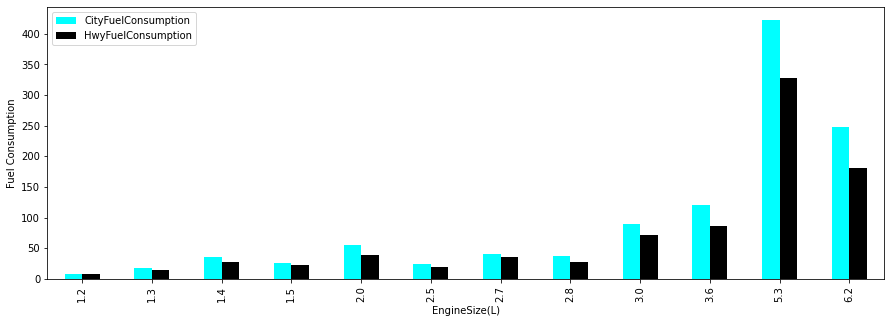

In [36]:
model_chevrolet.groupby('EngineSize(L)')[['CityFuelConsumption','HwyFuelConsumption']].sum().plot.bar(color=['cyan','black'],figsize=(15,5))
plt.ylabel('Fuel Consumption')
plt.show()

Here we can see Chevrolet car having 5.3 engine size has maximum fuel consumption.

#### Dataset based on Ford car

In [19]:
model_ford=df1[df1['Make']=='Ford']
model_ford

,Model Year,Make,Vehicle Class,EngineSize(L),Cylinders,Transmission,Fuel Type,CityFuelConsumption,HwyFuelConsumption,CombinedFuelConsumption,CO2Emissions(g/km),CO2Rating,SmogRating
278,2022,Ford,SUV: Small,2.3,4,AS10,X,12.1,11.2,24,275,4,5
279,2022,Ford,SUV: Small,2.3,4,M7,X,12.1,11.4,24,277,4,5
280,2022,Ford,SUV: Small,2.7,6,AS10,X,12.8,11.9,23,291,4,6
281,2022,Ford,SUV: Small,2.3,4,AS10,X,13.5,14.0,21,323,3,5
282,2022,Ford,SUV: Small,2.3,4,M7,X,14.9,13.5,20,336,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2022,Ford,Special purpose vehicle,2.5,4,AS6,X,12.0,8.9,27,249,5,5
363,2022,Ford,Special purpose vehicle,2.0,4,AS8,X,10.0,8.3,31,216,5,6
364,2022,Ford,Special purpose vehicle,2.0,4,AS8,X,10.0,8.3,31,216,5,5
365,2022,Ford,Special purpose vehicle,2.0,4,AS8,E,14.7,11.3,21,219,5,5


In [20]:
engine_ford=model_ford.groupby(['EngineSize(L)']).agg({'Cylinders':'sum',
                                                'CO2Emissions(g/km)':'sum','CO2Rating':'sum','SmogRating':'sum'})
engine_ford

,Cylinders,CO2Emissions(g/km),CO2Rating,SmogRating
EngineSize(L),,,,
1.5,9,589,17,21
2.0,48,2682,60,64
2.3,100,6717,107,129
2.5,20,920,34,30
2.7,42,2027,27,41
3.0,6,277,4,5
3.3,30,1267,23,30
3.5,102,5322,54,99
5.0,104,3964,43,55


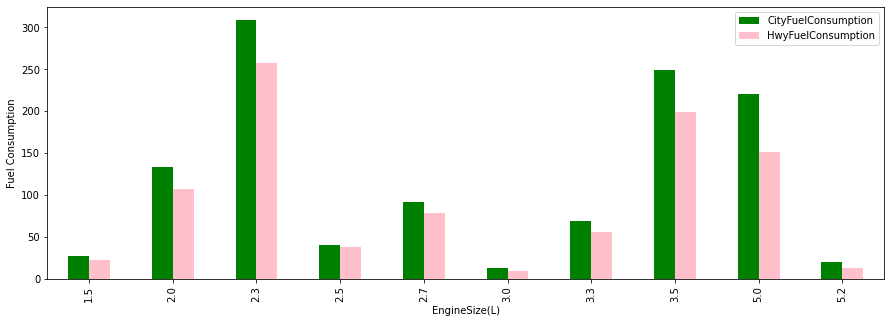

In [21]:
model_ford.groupby('EngineSize(L)')[['CityFuelConsumption','HwyFuelConsumption']].sum().plot.bar(color=['green','pink'],figsize=(15,5))
plt.ylabel('Fuel Consumption')
plt.show()

Here we can see Ford car having 2.3 engine size has the maximum consumption.

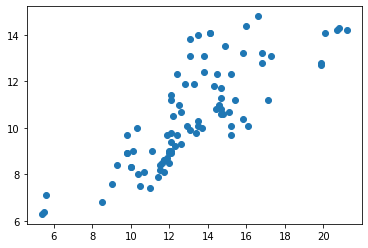

In [22]:
plt.scatter(model_ford.CityFuelConsumption,model_ford.HwyFuelConsumption)
plt.show()

KMean clustering

In [23]:
d=model_ford.drop(['CombinedFuelConsumption','CO2Emissions(g/km)','CO2Rating','SmogRating',
'Model Year','Make','Vehicle Class','EngineSize(L)','Cylinders','Transmission','Fuel Type'],axis=1)

In [24]:
from sklearn.cluster import KMeans

In [25]:
k=KMeans(n_clusters=3)

In [26]:
y=k.fit_predict(d)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0,
       1], dtype=int32)

In [27]:
d['cluster']=y

In [28]:
sf0=d[d.cluster==0]
sf1=d[d.cluster==1]
sf2=d[d.cluster==2]

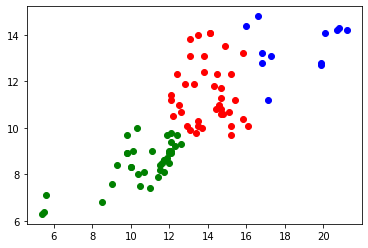

In [29]:
plt.scatter(sf0.CityFuelConsumption,sf0.HwyFuelConsumption,color='red')
plt.scatter(sf1.CityFuelConsumption,sf1.HwyFuelConsumption,color='green')
plt.scatter(sf2.CityFuelConsumption,sf2.HwyFuelConsumption,color='blue')
plt.show()

In [30]:
sse=[]
kr=range(1,10)
for k in kr:
    km = KMeans(n_clusters = k)
    km.fit(d)
    sse.append(km.inertia_)

In [31]:
sse

[1284.6791011235957,
 573.9654846938774,
 325.3578475033738,
 223.11855957767716,
 173.14563982683978,
 131.57976470588233,
 100.14099267399267,
 71.7439393939394,
 63.20959415584416]

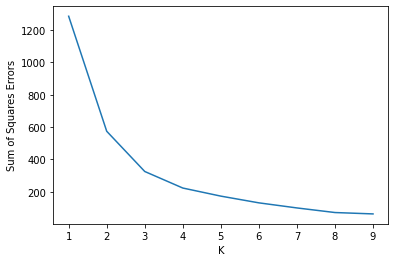

In [32]:
plt.xlabel('K')
plt.ylabel("Sum of Squares Errors")
plt.plot(kr,sse)
plt.show()

##### Observation
1.Carbon dioxide rating - Ford car has maximum and Bugatti car has the minimum.

2.Smog rating - Ford car has maximum and Bugatti car has the minimum.

3.Engine size - 2.0 has the maximum carbon emission.

## Conclusion
From this analysis of fuel consumption we can see that 2022 car models like Ford and Chevrolet have the maximum consumption of fuel and cars having engine size 2.0 has the maximum carbon emission.Also looking at the carbon dioxide rating we can see Bugatti car has the minimum rating.